#Procesamiento de Imágenes con scikit-image y scipy

###Objetivo: Aprender a leer, convertir y manipular imágenes usando scikit-image y scipy, con énfasis en espacios de color, formatos y estructuras de datos.

##1. Configuración Inicial

In [ ]:
!pip install scikit-image scipy --quiet  # Instalar si es necesario
from skimage import io, color, data
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

/tmp/ipython-input-1341873547.py:3: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


##2. Lectura y Visualización de Imágenes

A. Usando scikit-image

In [ ]:
#mUsar imagen de ejemplo (astronauta)
im = data.astronaut()
print("Tipo:", type(im), "Dimensiones:", im.shape, "Rango de valores:", im.dtype)
# Salida: <class 'numpy.ndarray'> (512, 512, 3) uint8

Tipo: <class 'numpy.ndarray'> Dimensiones: (512, 512, 3) Rango de valores: uint8


Visualizar:

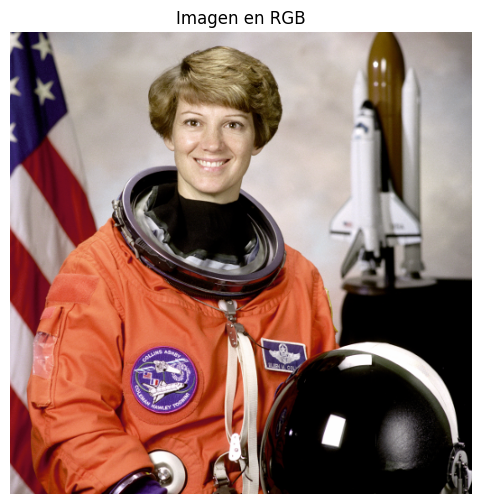

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(im)
plt.axis('off')
plt.title("Imagen en RGB")
plt.show()

B. Usando scipy.misc (solo para versiones antiguas)

In [ ]:
# Cargar imagen de ejemplo (cara de mapache)
im = misc.face()  # Obsoleto en versiones recientes de SciPy
plt.imshow(im), plt.axis('off'), plt.show()

AttributeError: module 'scipy.misc' has no attribute 'face'

## 3. Conversiones entre Espacios de Color
A. RGB a HSV (Matiz, Saturación, Valor)

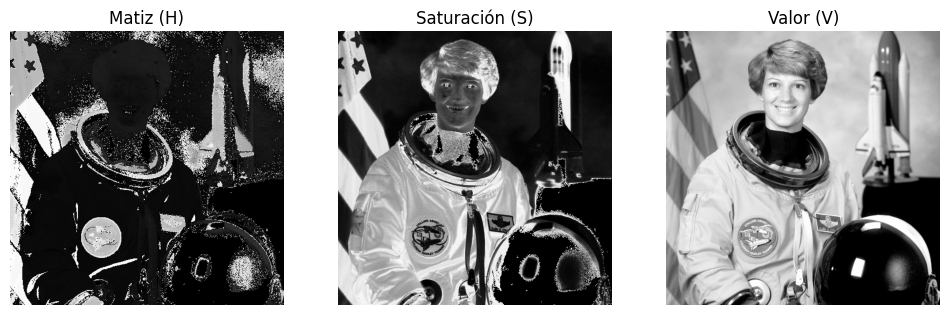

In [ ]:
im_hsv = color.rgb2hsv(im)  # Convertir a HSV

# Visualizar canales por separado
plt.figure(figsize=(12, 4))
canales = ['Matiz (H)', 'Saturación (S)', 'Valor (V)']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(im_hsv[:, :, i], cmap='gray')
    plt.title(canales[i])
    plt.axis('off')
plt.show()

B. Modificar Saturación

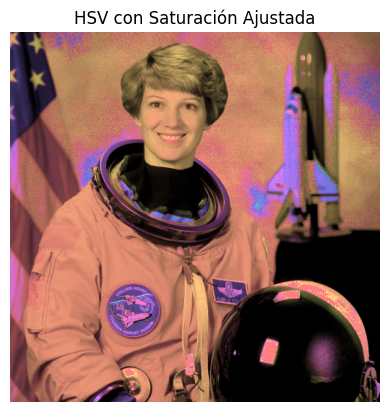

In [ ]:
im_hsv_mod = im_hsv.copy()
im_hsv_mod[:, :, 1] = 0.5  # Ajustar saturación al 50%
im_rgb_mod = color.hsv2rgb(im_hsv_mod)  # Volver a RGB

plt.imshow(im_rgb_mod)
plt.title("HSV con Saturación Ajustada")
plt.axis('off')
plt.show()

##4. Manipulación de Formatos y Tipos de Imagen
A. Convertir entre Formatos (PNG → JPG)

In [ ]:
# Usando PIL (para manejar modos como RGBA)
im_pil = Image.fromarray(im)
im_pil.save("imagen.jpg")  # Conversión automática a RGB si es RGBA
files.download("imagen.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

B. Convertir a Escala de Grises

Shape: (512, 512)


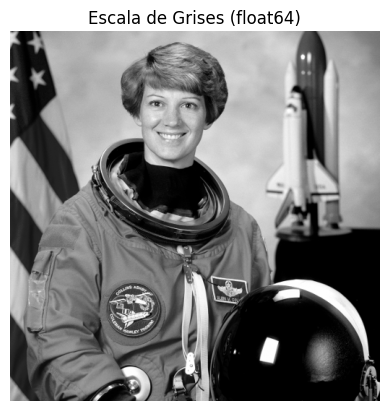

In [ ]:
im_gris = color.rgb2gray(im)  # scikit-image (rango 0-1)
print("Shape:", im_gris.shape)  # (alto, ancho)

# Mostrar
plt.imshow(im_gris, cmap='gray')
plt.title("Escala de Grises (float64)")
plt.axis('off')
plt.show()

Ejercicio 1:

¿Qué pasa si convertimos una imagen RGB a escala de grises usando solo el canal rojo (im[:, :, 0])? Comparar con rgb2gray.

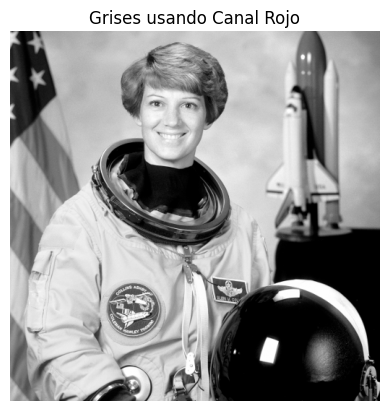

In [ ]:
im_gris_rojo = im[:, :, 0]  # Solo canal R
plt.imshow(im_gris_rojo, cmap='gray')
plt.title("Grises usando Canal Rojo")
plt.axis('off')
plt.show()

##6. Estructuras de Datos y Conversiones

A. De PIL a NumPy (y viceversa)

In [ ]:
# PIL → NumPy
im_pil = Image.open("imagen.jpg")
im_np = np.array(im_pil)  # Convertir a ndarray

# NumPy → PIL
im_np = data.astronaut()
im_pil = Image.fromarray(im_np)

## 7. Resumen de Funciones Clave

| Operación | Función | Biblioteca |
|---|---|---|
| Leer imagen | `io.imread()` | scikit-image |
| RGB a HSV | `color.rgb2hsv()` | scikit-image |
| Escala de grises | `color.rgb2gray()` | scikit-image |
| Guardar imagen | `Image.save()` | PIL |
| Visualizar múltiples imágenes | `io.imshow_collection()` | scikit-image |